# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 1381 Исайкин Георгий Иванович и Петров Александр Сергеевич. Вариант №4.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

### Дискретный нерекурсивный фильтр
Это фильтр, который считает выходной сигнал в момент времени $y_n$ по следующей формуле:
$$y_n=\sum^{N-1}_{k=0}c_kx_{n-k}$$
Где:
- $y_n$ - выходной сигнал в момент времени $n$;
- $x_{n-k}$ - входной сигнал в момент времени $n-k$;
- $с_k$ - коэффициент фильтра.
- $N$ - количество коэффициентов.

### Передаточная функция
Это функция $H$, отражающая связь сежду выходным и входным сигналами:
$$H=\frac{y_n}{x_n}$$
В случае с дискретным гармоническим сигналом принемает вид:
$$H(\omega)=\frac{\sum_{k=0}^{N-1}c_k\exp(i\omega(n-k))}{\exp(i\omega n)}=\sum^{N-1}_{k=0}c_k\exp(-i\omega k)$$

### Соотношение круговой и циклической частоты
Круговая $\omega$ и циклическая $f$ частоты соотнсятся следующим образом:
$$\omega=2\pi f$$

### Сглаживание с помощью формул Спенсора.
Для 15 точек:
$$y_n=\frac1{320}(-3x_{n-7}-6x_{n-6}-5x_{n-5}+3x_{n-4}+21x_{n-3}+46x_{n-2}+67x_{n-1}+74x_n+67x_{n+1}...)$$
Для 21 точки:
$$y_n=\frac1{350}(-x_{n-10}-3x_{n-9}-5x_{n-8}-5x_{n-7}-2x_{n-6}+6x_{n-5}+18x_{n-4}+33x_{n-3}+47x_{n-2}+57x_{n-1}+60x_n+57x_{n+1}...)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Задание 1
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.




Входной сигнал:
$$y_k=A+Bk$$
Минимизируем отклонение $y_k$ от входного сигнала $x_k$ через метод наименьших квадратов:
$$\sum^m_{-m}(x_k-y_k)^2=\sum^m_{-m}(x_k-A-Bk)^2=F(A,~B)\rightarrow \min$$
$$ \frac{\delta F(A,~B)}{\delta A}=0 \Rightarrow \sum^m_{-m}x_k-\sum^m_{-m}A-\sum^m_{-m}Bk=\sum^m_{-m}x_k -A(2m+1)=0$$

$$\Rightarrow A=\frac1{2m+1}\sum_{-m}^{m}x_{k}$$
$$y_0=A=\frac1{2m+1}\sum_{-m}^{m}x_{k}$$

$$y_n=\frac1{2m+1}\sum_{n-m}^{n+m}x_k$$
Получаем, что при $x_n=\exp(i\omega n)$ (гармонический ряд):
$$H(\omega) = \frac{y_n}{x_n}=\frac 1{2m+1}\sum_{k=-m}^{m}\exp(-i\omega k)$$

Немного преобразуем формулу:
$$\frac 1{2m+1}\sum_{k=-m}^{m}\exp(-i\omega k)=\frac 1{2m+1}\left(1+\sum_{k=1}^{m}(\exp(-i\omega k)+\exp(i\omega k))\right)=$$
$$=\frac 1{2m+1}\left(1+\sum_{k=1}^{m}(\cos(-\omega k)+i\sin(-\omega k)+\cos(\omega k) + i\sin(\omega k))\right)=\frac 1{2m+1}\left(1+\sum_{k=1}^{m}(2\cos(\omega k))\right)$$
Переведём в циклическую частоту и получим:
$$\tilde H(f)=\frac 1{2m+1}\left(1+\sum_{k=1}^{m}(2\cos(2\pi f k))\right)$$




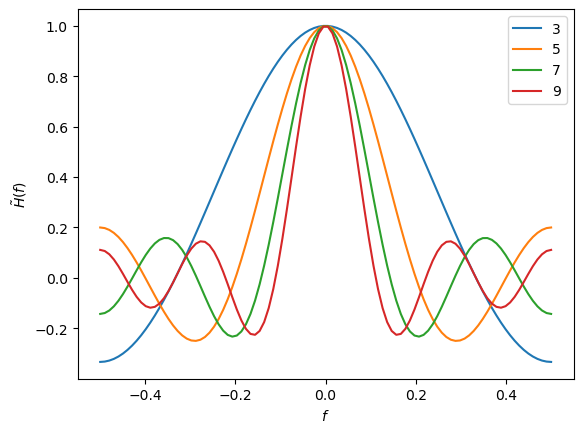

In [2]:
# Определим функцию H(f)
H = lambda f, m: (1 + sum([2 * np.cos(np.pi * 2 *f * k) for k in range(1, m + 1)])) / (2 * m + 1)

# Определим интервал циклической частоты
df1 = pd.DataFrame({'f': np.linspace(-0.5, 0.5, 100)})

# Определим функцию H c разным количеством точек
H3 = lambda f: H(f, 1)
H5 = lambda f: H(f, 2)
H7 = lambda f: H(f, 3)
H9 = lambda f: H(f, 4)

# Применим функции H к ряду
df1[3] = df1['f'].apply(H3)
df1[5] = df1['f'].apply(H5)
df1[7] = df1['f'].apply(H7)
df1[9] = df1['f'].apply(H9)

# Отрисуем полученный результат
fig, ax = plt.subplots()
sns.lineplot(x='f', y=3, data=df1, ax=ax, label='3')
sns.lineplot(x='f', y=5, data=df1, ax=ax, label='5')
sns.lineplot(x='f', y=7, data=df1, ax=ax, label='7')
sns.lineplot(x='f', y=9, data=df1, ax=ax, label='9')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()
    

Количество экстремумов совпадает с количеством точек, использованых для сглаживания. Также чем больше точек, тем больше качество фильтра - сильнее гасятся шумы.

### Задание 2
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал:
$$y_k=A+Bk+Ck^2$$
Минимизируем отклонение $y_k$ от входного сигнала $x_k$ через метод наименьших квадратов:
$$\sum^m_{-m}(x_k-y_k)^2=\sum^m_{-m}(x_k-A-Bk-Ck^2)^2=F(A,~B,~C)\rightarrow \min$$
$$ \frac{\delta F(A,~B,~C)}{\delta A}=0 \Rightarrow \sum^m_{-m}x_k-\sum^m_{-m}A-\sum^m_{-m}Bk-\sum^m_{-m}Ck^2=\sum^m_{-m}x_k -A(2m+1)-C\frac{m(m+1)(2m+1)}{3}=0$$
$$ \frac{\delta F(A,~B,~C)}{\delta C}=0 \Rightarrow \sum^m_{-m}x_kk^2-\sum^m_{-m}Ak^2-\sum^m_{-m}Bk^3-\sum^m_{-m}Ck^4=\sum^m_{-m}x_kk^2 -A\frac{m(m+1)(2m+1)}{3}-C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}=0$$
$$\begin{cases}\sum^m_{-m}x_k -A(2m+1)-C\frac{m(m+1)(2m+1)}{3}=0 \\ \sum^m_{-m}x_kk^2 -A\frac{m(m+1)(2m+1)}{3}-C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}=0 \end{cases}\Rightarrow A=\frac{\sum^m_{-m}x_kk^2 - \frac{3m^2+3m-1}5\sum_{-m}^mx_k}{\frac{m(m+1)(2m+1)}{3}-\frac{(3m^2+3m-1)(2m+1)}{5}}$$
$$y_0=A=\frac{\sum^m_{-m}x_kk^2 - \frac{3m^2+3m-1}5\sum_{-m}^mx_k}{\frac{m(m+1)(2m+1)}{3}-\frac{(3m^2+3m-1)(2m+1)}{5}}$$

В итоге получаем:
- Для 7 точек:
$$y_n=\frac1{21}(-2x_{n-3}+3x_{n-2}+6x_{n-1}+7x_n+6s_{n+1}+3x_{n+2}-2x_{n+3})$$
$$\tilde H(f)=\frac1{21}(7+12\cos(2\pi f)+6\cos(4\pi f)-4\cos(6\pi f))$$
- Для 9 точек:
$$y_n=\frac1{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$
$$\tilde H(f)=\frac1{231}(59+108\cos(2\pi f)+78\cos(4\pi f)+28\cos(6\pi f)-42\cos(8\pi f))$$
- Для 11 точек:
$$y_n=\frac1{429}(-36x_{n-5}+9x_{n-4}+44x_{n-3}+69x_{n-2}+84x_{n-1}+89x_n+84x_{n+1}+69x_{n+2}+44x_{n+3}+9x_{n+4}-36x_{n+5})$$
$$\tilde H(f)=\frac1{429}(89+168\cos(2\pi f)+138\cos(4\pi f)+88\cos(6\pi f)+18\cos(8\pi f)-72cos(10\pi f))$$
- Для 13 точек:
$$y_n=\frac1{143}(-11x_{n-6}+9x_{n-4}+16x_{n-3}+21x_{n-2}+24x_{n-1}+25x_n+24x_{n+1}+21x_{n+2}+16x_{n+3}+9x_{n+4}-11x_{n+6})$$
$$\tilde H(f)=\frac1{143}(25+48\cos(2\pi f)+42\cos(4\pi f)+32\cos(6\pi f)+18\cos(8\pi f)-22cos(12\pi f))$$

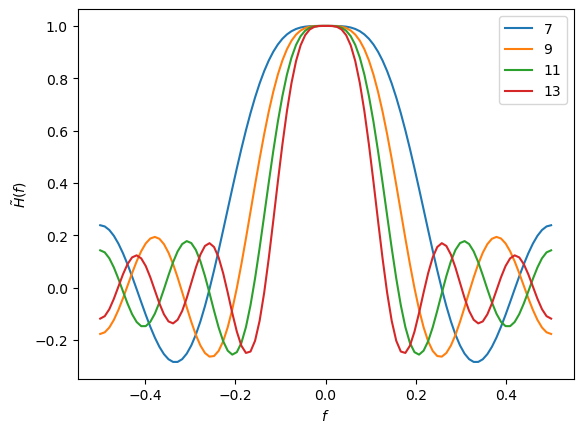

In [3]:
# Определим интервал циклической частоты
df2 = pd.DataFrame({'f': np.linspace(-0.5, 0.5, 100)})

# Определим функцию H c разным количеством точек
H7 = lambda f: 1/21*(7 + 12*np.cos(2*np.pi*f) + 6*np.cos(4*np.pi*f) - 4*np.cos(6*np.pi*f))
H9 = lambda f: 1/231*(59 + 108*np.cos(2*np.pi*f) + 78*np.cos(4*np.pi*f) + 28*np.cos(6*np.pi*f) - 42*np.cos(8*np.pi*f))
H11 = lambda f: 1/429*(89 + 168*np.cos(2*np.pi*f) + 138*np.cos(4*np.pi*f) + 88*np.cos(6*np.pi*f) + 18*np.cos(8*np.pi*f) - 72*np.cos(10*np.pi*f))
H13 = lambda f: 1/143*(25 + 48*np.cos(2*np.pi*f) + 42*np.cos(4*np.pi*f) + 32*np.cos(6*np.pi*f) + 18*np.cos(8*np.pi*f) - 22*np.cos(12*np.pi*f))

# Применим функции H к ряду
df2[7] = df2['f'].apply(H7)
df2[9] = df2['f'].apply(H9)
df2[11] = df2['f'].apply(H11)
df2[13] = df2['f'].apply(H13)

# Отрисуем полученный результат
fig, ax = plt.subplots()
sns.lineplot(x='f', y=7, data=df2, ax=ax, label='7')
sns.lineplot(x='f', y=9, data=df2, ax=ax, label='9')
sns.lineplot(x='f', y=11, data=df2, ax=ax, label='11')
sns.lineplot(x='f', y=13, data=df2, ax=ax, label='13')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

С увеличением количества точек фильтр лучше пропускает низкочастотные компоненты и более эффективно подавляет высокочастотные шумы, становясь менее строгим и более устойчивым к флуктуациям. Однако большое количество точек может вызвать искажения сигнала из-за задержки.

### Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал:
$$y_k=A+Bk+Ck^2+Dk^3+Ek^4$$
Минимизируем отклонение $y_k$ от входного сигнала $x_k$ через метод наименьших квадратов:
$$\sum^m_{-m}(x_k-y_k)^2=\sum^m_{-m}(x_k-A-Bk-Ck^2-Dk^3-Ek^4)^2=F(A,~B,~C,~D,~E)\rightarrow \min$$
$$ \frac{\delta F(A,~B,~C,~D,~E)}{\delta A}=0 \Rightarrow \sum^m_{-m}x_k-\sum^m_{-m}A-\sum^m_{-m}Bk-\sum^m_{-m}Ck^2-\sum^m_{-m}Dk^3-\sum^m_{-m}Ek^4=\sum^m_{-m}x_k -A(2m+1)-C\frac{m(m+1)(2m+1)}{3} -E\frac{m(m+1)(2m+1)(3n^2+3n-1)}{15}=0$$

$$ \frac{\delta F(A,~B,~C,~D,~E)}{\delta C}=0 \Rightarrow \sum^m_{-m}x_kk^2-\sum^m_{-m}Ak^2-\sum^m_{-m}Bk^3-\sum^m_{-m}Ck^4-\sum^m_{-m}Dk^5-\sum^m_{-m}Ek^6=\sum^m_{-m}x_kk^2 -A\frac{m(m+1)(2m+1)}{3}-C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}-E\frac{m(m+1)(2m+1)(3m^4+6m^3-3m+1)}{21}=0$$

$$ \frac{\delta F(A,~B,~C,~D,~E)}{\delta E}=0 \Rightarrow \sum^m_{-m}x_kk^4-\sum^m_{-m}Ak^4-\sum^m_{-m}Bk^5-\sum^m_{-m}Ck^6-\sum^m_{-m}Dk^7-\sum^m_{-m}Ek^8=\sum^m_{-m}x_kk^4 -A\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}-C\frac{m(m+1)(2m+1)(3m^4+6m^3-3m+1)}{21}-E\frac{10m^9+45m^8+60m^7-42m^5+20m^3-3n}{45}=0$$


Проводя аналогичные рассуждения, которые были проделаны в задании 2 получаем:
- Для 9 точек:
$$y_n=\frac1{429}(15x_{n-4}-55x_{n-3}+30x_{n-2}+135x_{n-1}+179x_n+135s_{n+1}+30x_{n+2}-55x_{n+3}+15x_{n+4})$$
$$\tilde H(f)=\frac1{429}(179+270\cos(2\pi f)+60\cos(4\pi f)-110\cos(6\pi f)+30\cos(8\pi f))$$
- Для 11 точек:
$$y_n=\frac1{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60-x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}-10x_{n+3}-45x_{n+4}+18x_{n+5})$$
$$\tilde H(f)=\frac1{429}(143+240\cos(2\pi f)+120\cos(4\pi f)-20\cos(6\pi f)-90\cos(8\pi f)+36cos(10\pi f))$$
- Для 13 точек:
$$y_n=\frac1{2431}(110x_{n-6}-198x_{n-5}-135x_{n-4}+110x_{n-3}+390x_{n-2}+600x_{n-1}+677x_n+600x_{n+1}+390x_{n+2}+110x_{n+3}-135x_{n+4}-198x_{n+5}+110x_{n+6})$$
$$\tilde H(f)=\frac1{2431}(677+1200\cos(2\pi f)+780\cos(4\pi f)+220\cos(6\pi f)-270\cos(8\pi f)-396\cos(8\pi f)+220cos(12\pi f))$$
- Для 15 точек:
$$y_n=\frac1{46189}(46x_{n-7}-13x_{n-6}+11x_{n-5}+17x_{n-4}+21x_{n-3}+23x_{n-2}+24x_{n-1}+25x_n+24x_{n+1}+23x_{n+2}+21x_{n+3}+17x_{n+4}+11x_{n+5}-13x_{n+6}+46x_{n+7})$$
$$\tilde H(f)=\frac1{46189}(11063+20250\cos(2\pi f)+15000\cos(4\pi f)+7510\cos(6\pi f)-330\cos(8\pi f)+5874\cos(10\pi f)-5720cos(12\pi f)+4290\cos(14\pi f))$$

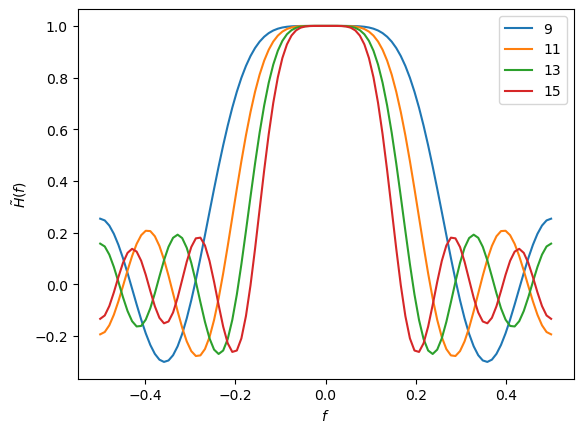

In [4]:
# Определим интервал циклической частоты
df3 = pd.DataFrame({'f': np.linspace(-0.5, 0.5, 100)})

# Определим функцию H c разным количеством точек
H9 = lambda f: (1 / 429) * (179 + 270 * np.cos(2 * np.pi * f) + 
                           60 * np.cos(4 * np.pi * f) - 
                           110 * np.cos(6 * np.pi * f) +
                           30 * np.cos(8 * np.pi * f))

H11 = lambda f: (1 / 429) * (143 + 240 * np.cos(2 * np.pi * f) + 
                             120 * np.cos(4 * np.pi * f) - 
                             20 * np.cos(6 * np.pi * f) - 
                             90 * np.cos(8 * np.pi * f) + 
                             36 * np.cos(10 * np.pi * f))

H13 = lambda f: (1 / 2431) * (677 + 1200 * np.cos(2 * np.pi * f) + 
                             780 * np.cos(4 * np.pi * f) + 
                             220 * np.cos(6 * np.pi * f) - 
                             270 * np.cos(8 * np.pi * f) -
                             396 * np.cos(10*np.pi * f) + 
                             220 * np.cos(12 * np.pi * f))

H15 = lambda f: (1 / 46189) * (11063 + 20250 * np.cos(2 * np.pi * f) + 
                             15000 * np.cos(4 * np.pi * f) + 
                             7510 * np.cos(6 * np.pi * f) - 
                             330 * np.cos(8 * np.pi * f) - 
                             5874 * np.cos(10 * np.pi * f) - 
                             5720 * np.cos(12 * np.pi * f) + 
                             4290 * np.cos(14 * np.pi * f))

# Применим функции H к ряду
df3[9] = df3['f'].apply(H9)
df3[11] = df3['f'].apply(H11)
df3[13] = df3['f'].apply(H13)
df3[15] = df3['f'].apply(H15)

# Отрисуем полученный результат
fig, ax = plt.subplots()
sns.lineplot(x='f', y=9, data=df3, ax=ax, label='9')
sns.lineplot(x='f', y=11, data=df3, ax=ax, label='11')
sns.lineplot(x='f', y=13, data=df3, ax=ax, label='13')
sns.lineplot(x='f', y=15, data=df3, ax=ax, label='15')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

Увеличение количества точек N делает фильтр более плавным и устойчивым к шуму, расширяет полосу пропускания, но может привести к задержке и искажениям из-за усреднения по более широкому диапазону данных.

### Задание 4
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал $y_n$ сглаживания по формулам Спенсера для 15 точек:
$$y_n=\frac1{320}(-3x_{n-7}-6x_{n-6}-5x_{n-5}+3x_{n-4}+21x_{n-3}+46x_{n-2}+67x_{n-1}+74x_n+67x_{n+1}...)$$
Пердаточная функция $\tilde H(f)$ для него:
$$\tilde H(f)=\frac1{320}(74+134\cos(2\pi f)+92\cos(4\pi f)+42\cos(6\pi f)+6\cos(8\pi f)-10\cos(10\pi f)-12\cos(12\pi f)-6\cos(14\pi f))$$
Выходной сигнал $y_n$ сглаживания по формулам Спенсера для 21 точек:
$$y_n=\frac1{350}(-x_{n-10}-3x_{n-9}-5x_{n-8}-5x_{n-7}-2x_{n-6}+6x_{n-5}+18x_{n-4}+33x_{n-3}+47x_{n-2}+57x_{n-1}+60x_n+57x_{n+1}...)$$
Пердаточная функция $\tilde H(f)$ для него:
$$\tilde H(f)=\frac1{350}(60+114\cos(2\pi f)+94\cos(4\pi f)+66\cos(6\pi f)+36\cos(8\pi f)+12\cos(10\pi f)-4\cos(12\pi f)-10\cos(14\pi f)-10\cos(16\pi f)-6\cos(18\pi f)-2\cos(20\pi f))$$

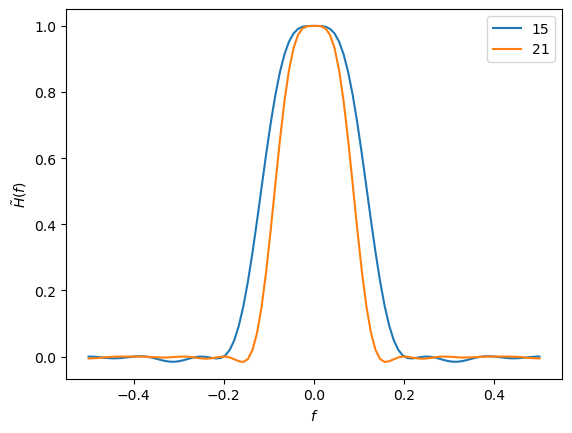

In [5]:
# Определим интервал циклической частоты
df4 = pd.DataFrame({'f': np.linspace(-0.5, 0.5, 100)})

# Определим функцию H c разным количеством точек
H15 = lambda f: 1/320*(74 + 134*np.cos(2*np.pi*f) + 92*np.cos(4*np.pi*f) + 42*np.cos(6*np.pi*f) + 6*np.cos(8*np.pi*f) - 10*np.cos(10*np.pi*f) - 12*np.cos(12*np.pi*f) - 6*np.cos(14*np.pi*f))
H21 = lambda f: 1/350*(60 + 114*np.cos(2*np.pi*f) + 94*np.cos(4*np.pi*f) + 66*np.cos(6*np.pi*f) + 36*np.cos(8*np.pi*f) + 12*np.cos(10*np.pi*f) - 4*np.cos(12*np.pi*f) - 10*np.cos(14*np.pi*f) - 10*np.cos(16*np.pi*f) - 6*np.cos(18*np.pi*f) - 2*np.cos(20*np.pi*f))

# Применим функции H к ряду
df4[15] = df4['f'].apply(H15)
df4[21] = df4['f'].apply(H21)

# Отрисуем полученный результат
fig, ax = plt.subplots()
sns.lineplot(x='f', y=15, data=df4, ax=ax, label='15')
sns.lineplot(x='f', y=21, data=df4, ax=ax, label='21')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

При увеличении количества точек (с 15 до 21) передаточная функция фильтра Спенсера становится более плавной, что приводит к лучшему подавлению высокочастотных компонентов и увеличивает устойчивость к шуму.

### Задание 5
Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

In [6]:
# Определим функцию для преобразования в логарифмическую шкалу
log_sc = lambda x: 20 * np.log(abs(x))

# Применим её
df1[[3, 5, 7, 9]] = df1[[3, 5, 7, 9]].map(log_sc)
df2[[7, 9, 11, 13]] = df2[[7, 9, 11, 13]].map(log_sc)
df3[[9, 11, 13, 15]] = df3[[9, 11, 13, 15]].map(log_sc)
df4[[15, 21]] = df4[[15, 21]].map(log_sc)

/tmp/ipykernel_52824/251822716.py:2: RuntimeWarning: divide by zero encountered in log
  log_sc = lambda x: 20 * np.log(abs(x))


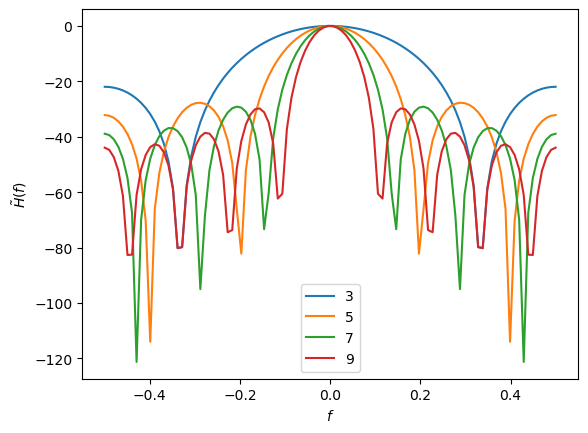

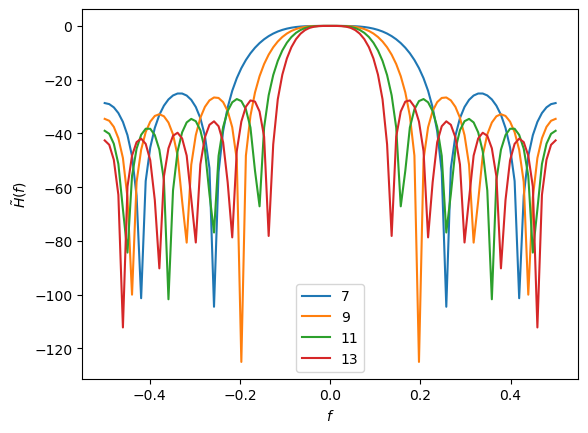

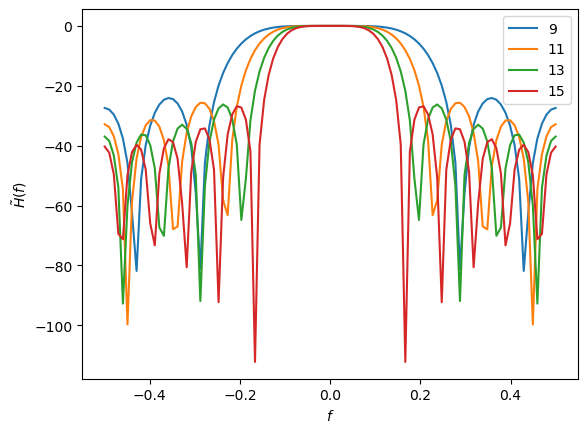

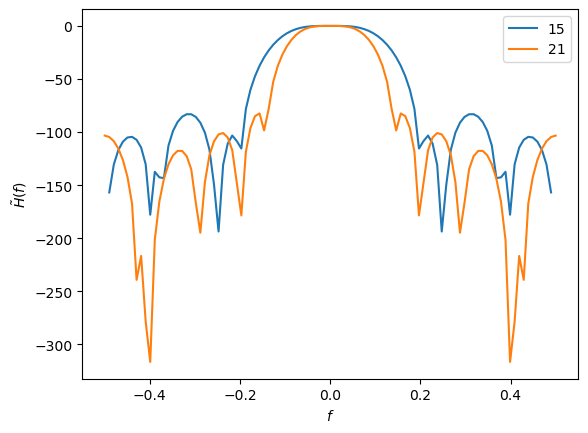

In [7]:
# Отрисуем полученный результат
fig, ax = plt.subplots()
sns.lineplot(x='f', y=3, data=df1, ax=ax, label='3')
sns.lineplot(x='f', y=5, data=df1, ax=ax, label='5')
sns.lineplot(x='f', y=7, data=df1, ax=ax, label='7')
sns.lineplot(x='f', y=9, data=df1, ax=ax, label='9')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x='f', y=7, data=df2, ax=ax, label='7')
sns.lineplot(x='f', y=9, data=df2, ax=ax, label='9')
sns.lineplot(x='f', y=11, data=df2, ax=ax, label='11')
sns.lineplot(x='f', y=13, data=df2, ax=ax, label='13')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x='f', y=9, data=df3, ax=ax, label='9')
sns.lineplot(x='f', y=11, data=df3, ax=ax, label='11')
sns.lineplot(x='f', y=13, data=df3, ax=ax, label='13')
sns.lineplot(x='f', y=15, data=df3, ax=ax, label='15')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x='f', y=15, data=df4, ax=ax, label='15')
sns.lineplot(x='f', y=21, data=df4, ax=ax, label='21')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()


На логарифмической шкале упрощается анализ частотных характеристик систем, позволяя эффективно отображать как низкие, так и высокие частоты на одном графике.

### Задание 6
Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Сопоставительный анализ свойств передаточных функций:

- Сглаживание прямой линией (по 3, 5, 7, 9 точкам): С увеличением числа точек передаточная функция становится более плавной, а фильтр эффективнее подавляет высокочастотные шумы. Однако на низких частотах такие фильтры обеспечивают меньшее подавление.

- Сглаживание полиномом второй степени (по 7, 9, 11, 13 точкам): Фильтры второго порядка лучше сохраняют низкочастотные компоненты по сравнению с линейным сглаживанием, но при этом сильнее подавляют высокочастотные составляющие, особенно при большем количестве точек.

- Сглаживание полиномом четвертой степени (по 9, 11, 13, 15 точкам): Передаточные функции для полинома четвертого порядка показывают ещё более сильное подавление высоких частот, сохраняя при этом полезный сигнал на низких частотах, что делает фильтр более эффективным для задач, требующих сильного сглаживания.

- Сглаживание по формулам Спенсера (по 15 и 21 точке): Фильтры Спенсера имеют уникальные частотные характеристики — они обеспечивают хорошее подавление шума и более широкий диапазон частот, проходящих через фильтр, что подходит для данных, требующих минимального искажения на низких частотах.

- С увеличением порядка полинома и числа точек сглаживания фильтры становятся более эффективными в подавлении высокочастотных шумов, но могут приводить к задержке сигнала.

## Выводы

В ходе выполнения работы были получены и проанализированы передаточные функции нерекурсивных фильтров для различных методов полиномиального сглаживания временных рядов. Были построены графики амплитудно-частотных характеристик для фильтров, выполняющих усреднение по прямой линии, полиномам второй и четвертой степени, а также для формул Спенсера. Это позволило изучить частотные свойства передаточных функций, а также влияние количества точек сглаживания и порядка полинома на подавление высокочастотных составляющих сигнала.

Были выявлены следующие наблюдения:

* Количество точек сглаживания существенно влияет на подавление высокочастотных составляющих: чем больше точек, тем сильнее фильтр ослабляет высокие частоты.

* Порядок полинома также определяет частотные характеристики: фильтры более высокого порядка обеспечивают более крутой спад амплитуды на высоких частотах, что делает их эффективнее для подавления шума.

* Фильтры Спенсера обладают уникальными характеристиками, подходящими для специфических применений, где требуется компромисс между сохранением сигнала и сглаживанием.

* Построение графиков в логарифмической шкале (дБ) позволило выявить тонкости ослабления высокочастотных сигналов и сравнить фильтры на основе их частотных свойств. Таким образом, проведенный анализ дает понимание того, какой тип фильтра наиболее подходит для конкретных задач по сглаживанию временных рядов.